         gradient boosting implementation step by step from scratch

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree



In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
    

In [3]:
df = pd.DataFrame()


In [6]:
df['X'] = X.reshape(100)
df['y'] = y
     


In [7]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs Y')

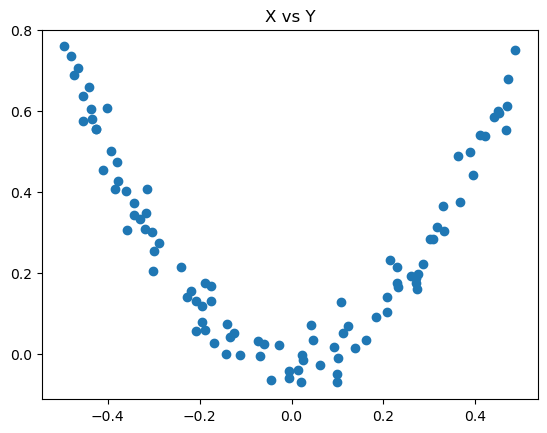

In [8]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

In [17]:
df['pred1'] = df['y'].mean()
df['res1'] = df['y'] - df['pred1']



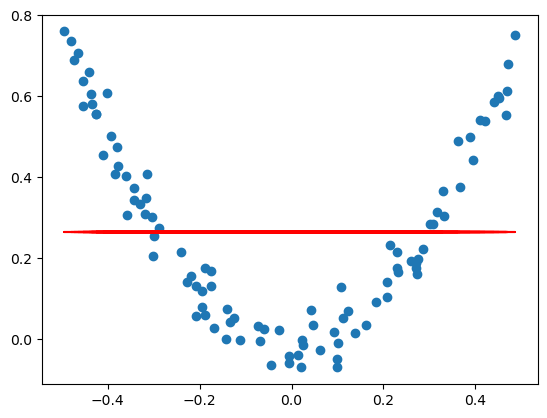

In [18]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')
     

In [19]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)


In [20]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)


DecisionTreeRegressor(max_leaf_nodes=8)

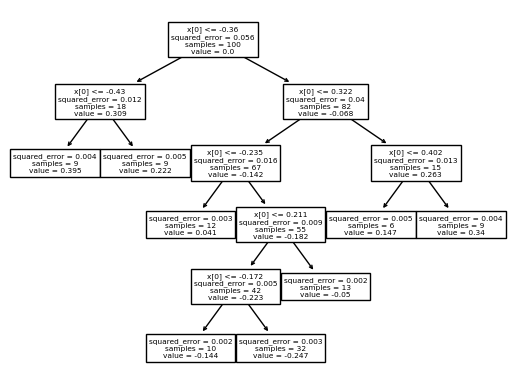

In [22]:
plot_tree(tree1)
plt.show()
    

In [23]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)
   

In [24]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))


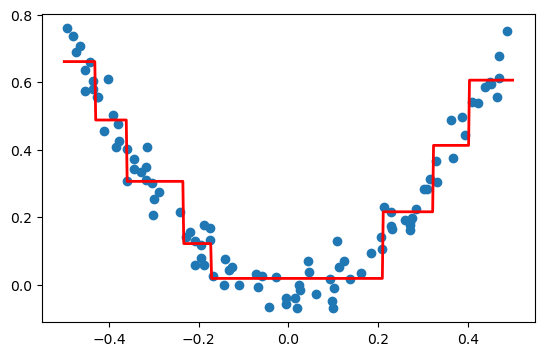

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
  # here all the data points are not fit with the model  as shown in figure.  

In [26]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))


In [27]:
df.head()

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964


In [28]:
df['res2'] = df['y'] - df['pred2']
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022


In [29]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)


In [30]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)


DecisionTreeRegressor(max_leaf_nodes=8)

In [31]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])


Text(0.5, 1.0, 'X vs y')

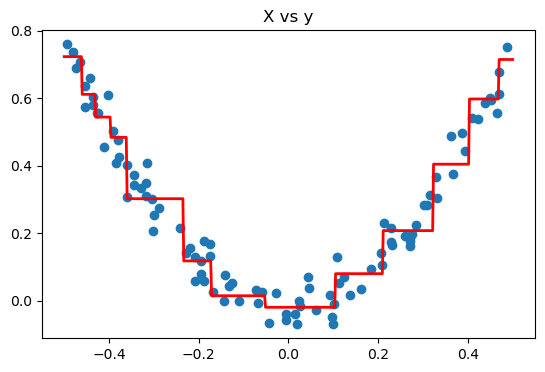

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')
# here all most all data point fit by the model.

In [41]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

3


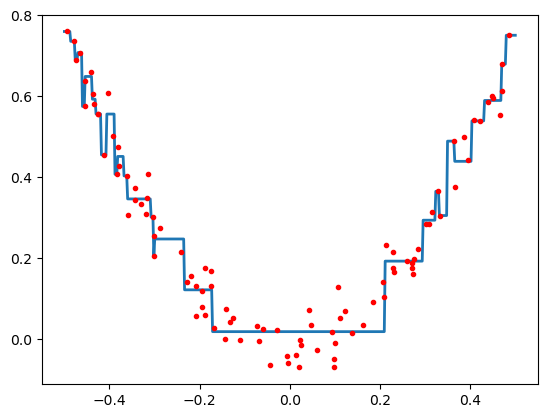

2


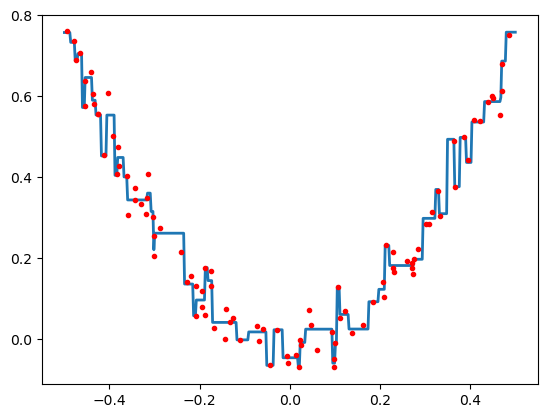

1


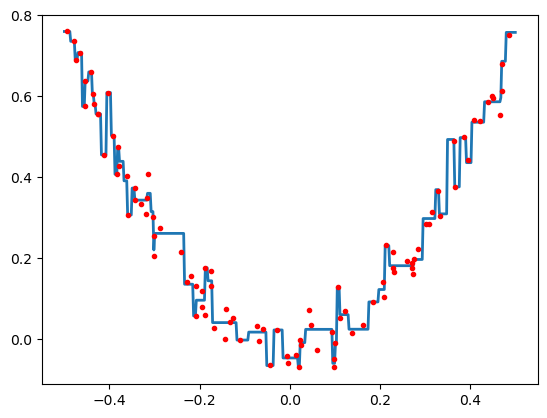

In [42]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,3,lr=1)
#For iteration 3,the plot shows how the datpoint fit with model.if more iteration be chosen, 
#then the model may shows overfitting condition.